## Objectif du TD N°1 interpretable Machine Learning


Ce td vise à interpréter les modèles de machine learning que vous avez crées lors du TD N°2 SVM.

Vous chercherez à interpréter globalement votre modèle avec les méthodes vues en cours et surtout examiner la différence entre des modèles linéaires et non linéaires.


## Enoncé du TD

### Importer le modèle du TD N°2

1. Importer le jeu de données breast cancer disponible dans le module sklearn.datasets
2. Importer un modèle non linéaire utilisé lors du TD N°2 ou alors recréer l'ensemble de la pipeline visant à le générer
3. Vérifier que votre modèle réalise correctement une prédiction pour un individu


### Comparer interprétation des coéfficients et méthode globale

4. Lancer un modèle de régression logistique sur le jeu de données data breast cancer et interpréter les résultats
5. Utiliser maintenant les différentes méthodes d'interprétation de modèle avec les résultats de le résultats des coefficients de la reg logistique
   1. Partial depence plot
   2. Accumulated Local Effect
   3. H-Statistic
   4. Feature permutation 
6. Commenter

### Interpréter un modèle non linéaire

7. Interpréter votre modèle non linéaire (SVM avec noyau) avec l'aide des méthodes globales
8. Commenter la différence de résultat






## Partie Code

#### 1)Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import pickle

In [2]:
#Load dataset breast cancer
data = load_breast_cancer()

breast = pd.DataFrame(data = np.c_[data.data,data.target], columns=list(data.feature_names)+['target'] )
#Nom des colonnes et remplacer les espaces par un "_"
features_name = [name.replace(" ", "_") for name in data.feature_names]
breast.columns= features_name+['target']

#### 2) Recréer l'ensemble de la pipeline visant à générer un SVM non linéaire (RBF ou degree >1)


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = breast.drop(columns=['target'])
y = breast['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a standard scaler and an SVM with RBF kernel
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


#### 3) Vérifier que votre modèle réalise correctement une prédiction pour un individu

In [4]:
# Select a sample from the test set
sample = X_test.iloc[0]

# Reshape the sample to match the expected input shape
sample_reshaped = sample.values.reshape(1, -1)

# Make a prediction
prediction = pipeline.predict(sample_reshaped)

# Print the prediction and the actual value
print(f'Predicted class: {prediction[0]}')
print(f'Actual class: {y_test.iloc[0]}')

Predicted class: 1.0
Actual class: 1.0


c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### 4) Lancer un modèle de régression logistique sur le jeu de données data breast cancer et interpréter les résultats

Ici, l'idée est de mobiliser vos connaissance du modèle de régression logistique et d'interpréter les effets des variables.

In [5]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Print the accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')

# Get the coefficients and interpret them
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
print(coefficients)

# Using statsmodels for detailed summary
X_train_sm = sm.add_constant(X_train)  # adding a constant
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit_regularized()
print(result.summary())

Logistic Regression Accuracy: 0.96
                    Feature  Coefficient
0               mean_radius     1.030534
1              mean_texture     0.222148
2            mean_perimeter    -0.358391
3                 mean_area     0.025123
4           mean_smoothness    -0.156743
5          mean_compactness    -0.233139
6            mean_concavity    -0.529852
7       mean_concave_points    -0.287110
8             mean_symmetry    -0.225352
9    mean_fractal_dimension    -0.034769
10             radius_error    -0.093663
11            texture_error     1.400691
12          perimeter_error    -0.176846
13               area_error    -0.087916
14         smoothness_error    -0.022581
15        compactness_error     0.052833
16          concavity_error    -0.036008
17     concave_points_error    -0.032383
18           symmetry_error    -0.033311
19  fractal_dimension_error     0.012490
20             worst_radius     0.139867
21            worst_texture    -0.509126
22          worst_peri

c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1338890570592614e-10
            Iterations: 386
            Function evaluations: 402
            Gradient evaluations: 386
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      424
Method:                           MLE   Df Model:                           30
Date:                Fri, 24 Jan 2025   Pseudo R-squ.:                   1.000
Time:                        11:24:57   Log-Likelihood:            -5.1592e-08
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                2.522e-107
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

c:\Users\nouhr\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


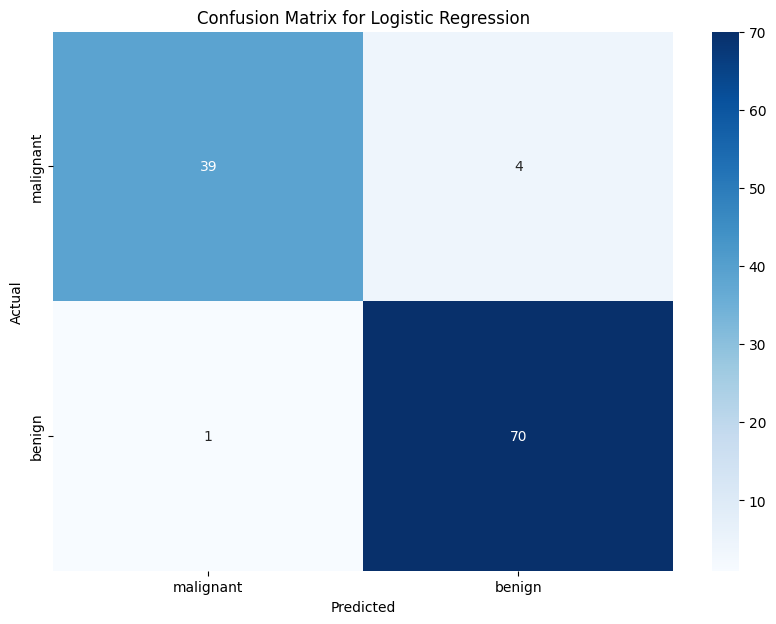

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [7]:
# Calculate sensitivity, specificity, and precision
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Precision: {precision:.2f}')

Sensitivity: 0.99
Specificity: 0.91
Precision: 0.95


#### 5) Utiliser maintenant les différentes méthodes d'interprétations de modèle avec les résultats de le résultats des coéfficients de la reg logistique
   1. Partial depence plot
   2. Accumulated Local Effect
   3. H-Statistic
   4. Feature permutation 

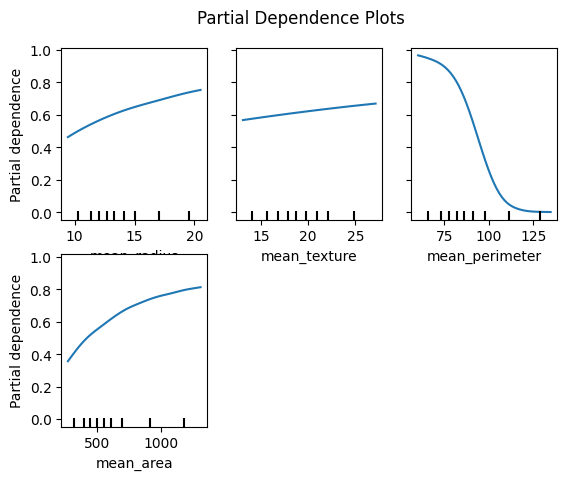

In [8]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import numpy as np
import pandas as pd
from pdpbox import pdp
from alibi.explainers import ALE
from pycebox.ice import ice, ice_plot

import matplotlib.pyplot as plt

# 1. Partial dependence plot
features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area']
PartialDependenceDisplay.from_estimator(log_reg, X_train, features, grid_resolution=50)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()


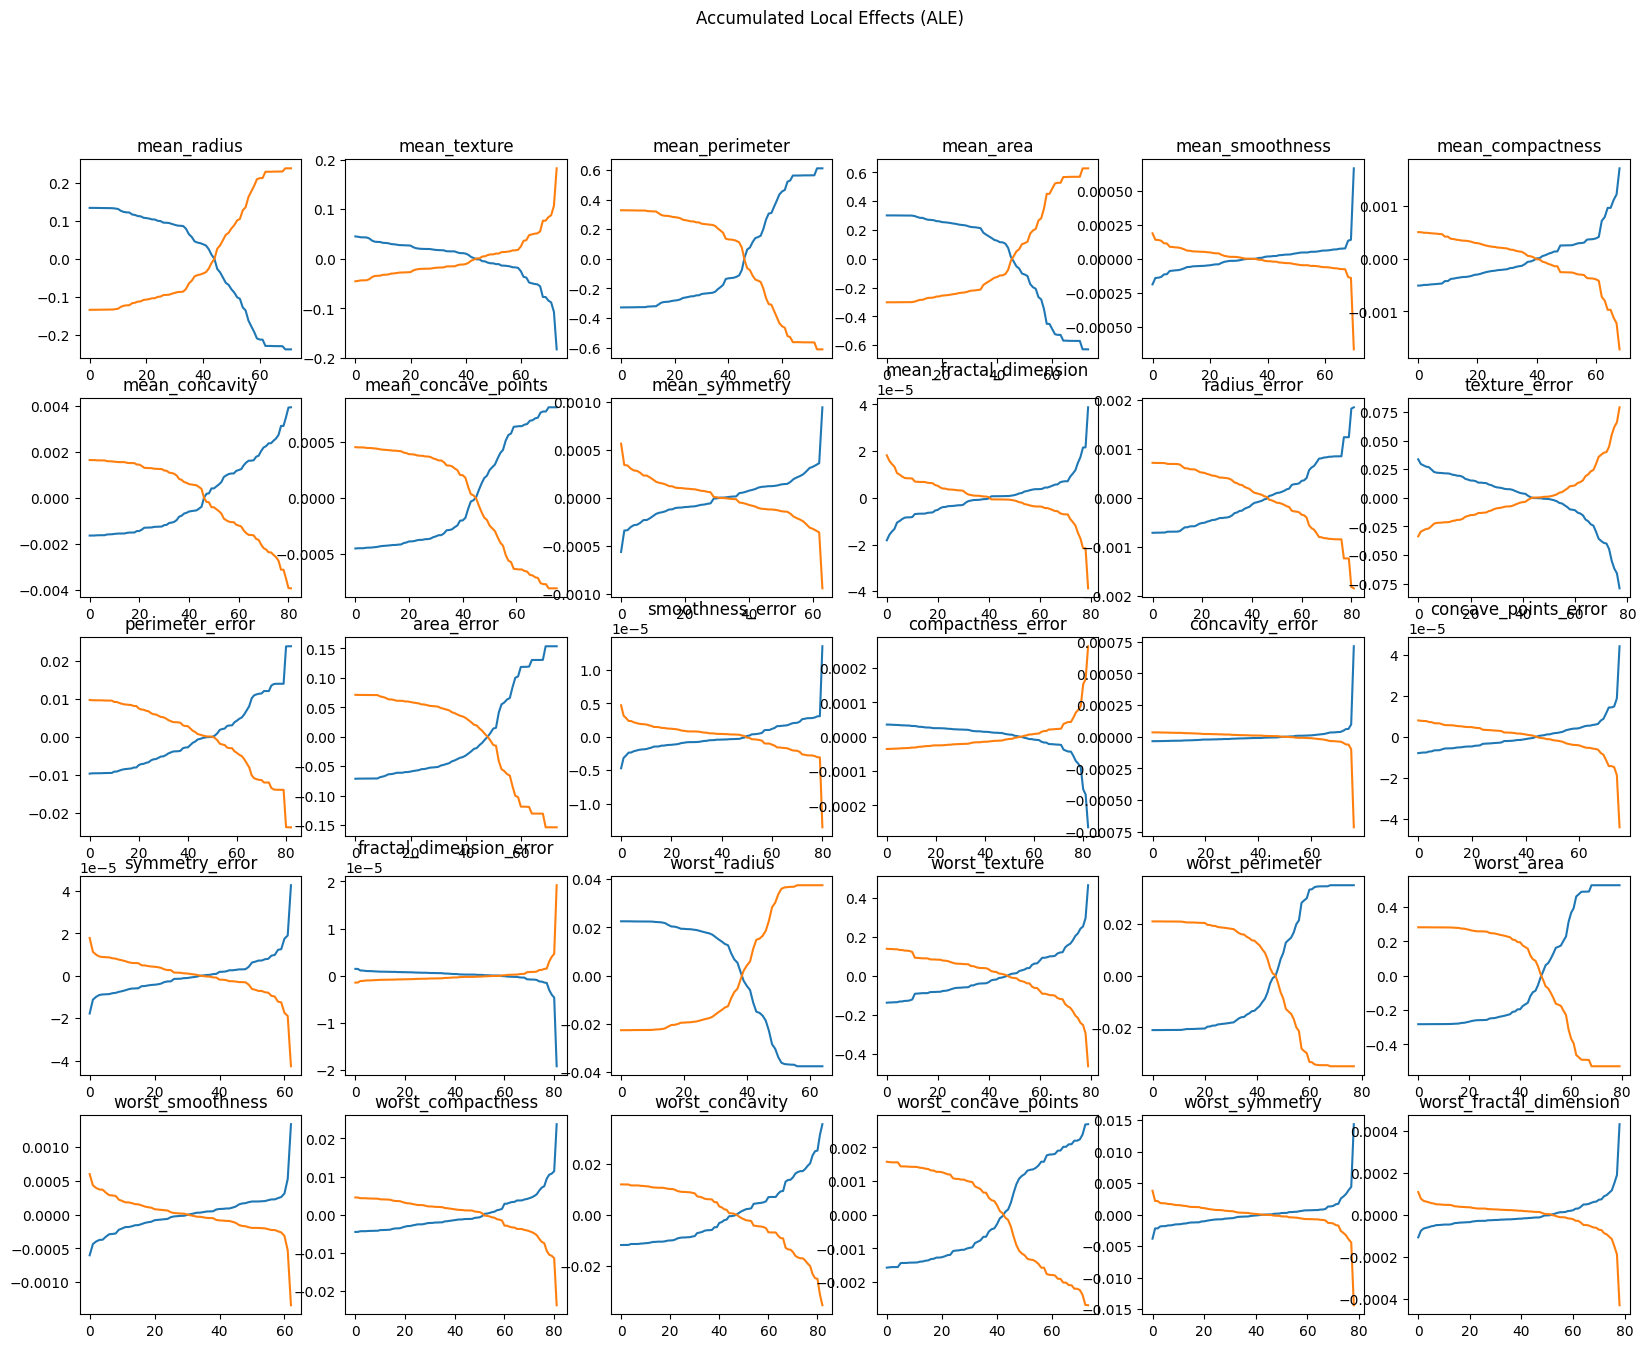

In [9]:
# 2. Accumulated Local Effect (ALE)
# ALE plots are not directly available in sklearn, we can use the ALEPython library

ale = ALE(log_reg.predict_proba, feature_names=features_name)
exp = ale.explain(X_train.values)
fig, ax = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
for i, ax in enumerate(ax.flatten()):
    if i < len(features_name):
        ax.plot(exp.ale_values[i], label=features_name[i])
        ax.set_title(features_name[i])
plt.suptitle('Accumulated Local Effects (ALE)')
plt.show()

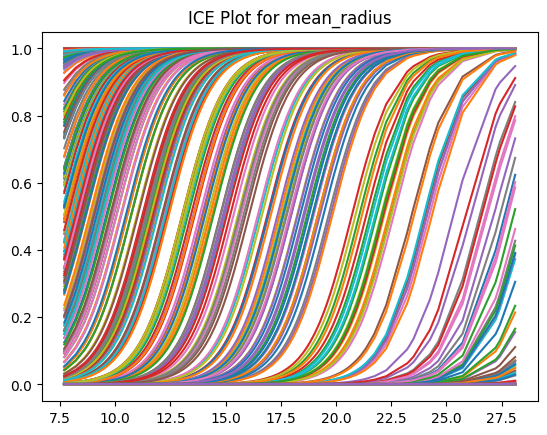

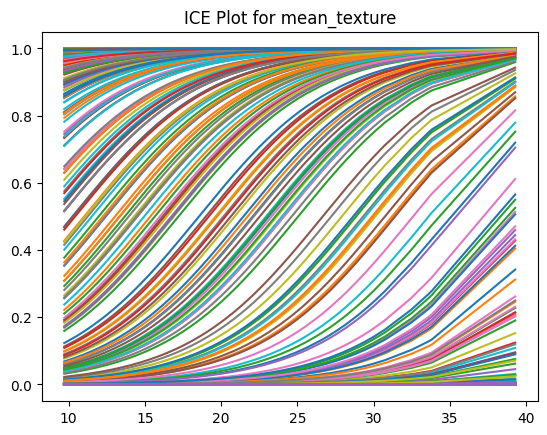

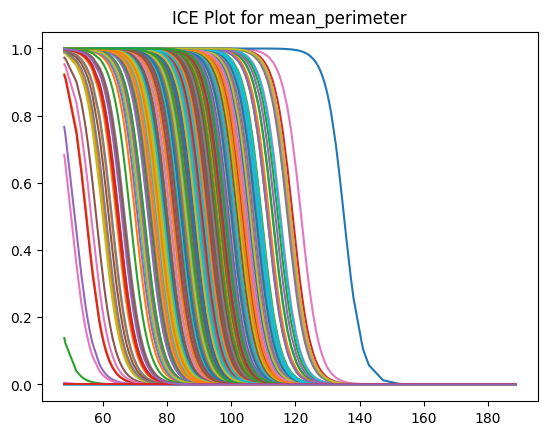

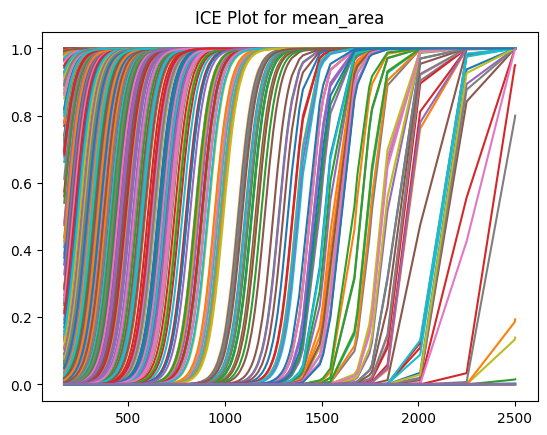

In [10]:
# 3. H-Statistic
# H-Statistic is not directly available in sklearn, we can use the pyCEbox library

for feature in features:
    ice_df = ice(X_train, feature, lambda x: log_reg.predict_proba(x)[:, 1])
    ice_plot(ice_df, frac_to_plot=int(0.1 * len(X_train)))
    plt.title(f'ICE Plot for {feature}')
    plt.show()


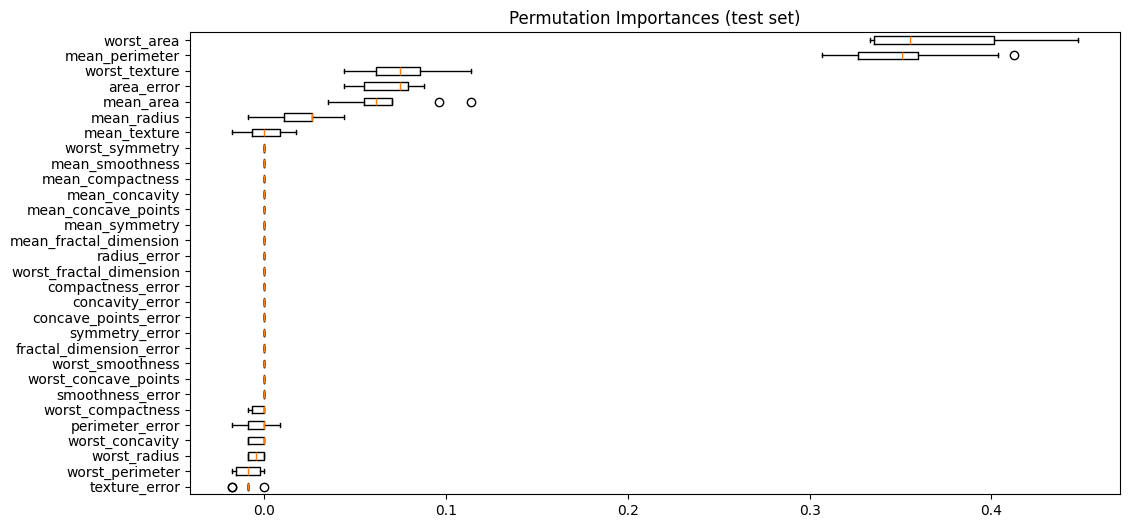

In [11]:
# 4. Feature permutation
result = permutation_importance(log_reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.show()

#### 6) Commenter et discuter des limites

Méthodes d'interprétation et leurs sorties sont sensibles aux corrélations importantes entre les features.

#### 7) Interpréter votre modèle non linéaire (SVM avec noyau) avec l'aide des méthodes globales